In [2]:
%pip install requests
## should install requests directly in a notebook cell

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl (99 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests


# Make an API call and check the response.
url = "https://api.github.com/search/repositories"
url += "?q=language:python+sort:stars+stars:>10000"

headers = {"Accept": "application/vnd.github.v3+json"} #client가 서버로 부터 기대하는 응답 타입: 이 경우는 Github API의 버전 3을 사용하고 json 타입으로 달라 
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# Convert the response object to a dictionary.
response_dict = r.json()

# Process results.
print(response_dict.keys()) # 200은 응답 성공

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


In [4]:
print(f"Total repositories: {response_dict['total_count']}")
print(f"Complete results: {not response_dict['incomplete_results']}")

# Explore information about the repositories.
repo_dicts = response_dict['items']
print(f"Repositories returned: {len(repo_dicts)}")

print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print(f"Name: {repo_dict['name']}")
    print(f"Owner: {repo_dict['owner']['login']}")
    print(f"Stars: {repo_dict['stargazers_count']}") ##별점 
    print(f"Repository: {repo_dict['html_url']}")
    print(f"Created: {repo_dict['created_at']}")
    print(f"Updated: {repo_dict['updated_at']}")
    print(f"Description: {repo_dict['description']}")
    print(f"\n")

Total repositories: 548
Complete results: True
Repositories returned: 30

Selected information about each repository:
Name: public-apis
Owner: public-apis
Stars: 313793
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2024-10-08T02:49:52Z
Description: A collective list of free APIs


Name: system-design-primer
Owner: donnemartin
Stars: 271838
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2024-10-08T02:35:28Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.


Name: awesome-python
Owner: vinta
Stars: 220804
Repository: https://github.com/vinta/awesome-python
Created: 2014-06-27T21:00:06Z
Updated: 2024-10-08T02:54:59Z
Description: An opinionated list of awesome Python frameworks, libraries, software and resources.


Name: Python
Owner: TheAlgorithms
Stars: 190185
Repository: https://github.com/TheAlgorithms/Python
Creat

https://api.github.com/rate_limit

API속도 제한 확인하기 : 교재 487

In [1]:
%pip install plotly

You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install nbformat
## 설치후 Restart 구동후 다음 코드를 실행 

     ---------------------------------------- 78.5/78.5 KB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 88.5/88.5 KB ? eta 0:00:00
     ------------------------------------- 213.2/213.2 KB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 63.0/63.0 KB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import requests
import plotly.express as px


# Make an API call and check the response.
url = "https://api.github.com/search/repositories"
url += "?q=language:python+sort:stars+stars:>10000"

headers = {"Accept": "application/vnd.github.v3+json"}
r = requests.get(url, headers=headers)
print(f"Status code: {r.status_code}")

# Process overall results.
response_dict = r.json()
print(f"Complete results: {not response_dict['incomplete_results']}")

# Process repository information.
repo_dicts = response_dict['items']
repo_links, stars, hover_texts = [], [], []
for repo_dict in repo_dicts:
    # Turn repo names into active links.
    repo_name = repo_dict['name']
    repo_url = repo_dict['html_url']
    repo_link = f"<a href='{repo_url}'>{repo_name}</a>"
    repo_links.append(repo_link)

    stars.append(repo_dict['stargazers_count'])

    # Build hover texts.
    owner = repo_dict['owner']['login']
    description = repo_dict['description']
    hover_text = f"{owner}<br />{description}"
    hover_texts.append(hover_text)

# Make visualization.
title = "GitHub의 가장 인기있는 파이썬 프로젝트"
labels = {'x': '저장소', 'y': '별점'}
fig = px.bar(x=repo_links, y=stars, title=title, labels=labels,
        hover_name=hover_texts)

fig.update_layout(title_font_size=20, xaxis_title_font_size=20,
        yaxis_title_font_size=20)

fig.update_traces(marker_color='SteelBlue', marker_opacity=0.6)

fig.show()

Status code: 200
Complete results: True


https://plotly.com/python/plotly-express/
그래프 라이브러리 유형을 볼 필요

In [4]:
#댓글

import requests
import json


# Make an API call, and store the response.
url = "https://hacker-news.firebaseio.com/v0/item/31353677.json"
r = requests.get(url)
print(f"Status code: {r.status_code}")

# Explore the structure of the data.
response_dict = r.json()
response_string = json.dumps(response_dict, indent=4)
print(response_string)

Status code: 200
{
    "by": "sohkamyung",
    "descendants": 307,
    "id": 31353677,
    "kids": [
        31354987,
        31354235,
        31354040,
        31358602,
        31354201,
        31354991,
        31354315,
        31353775,
        31353925,
        31354169,
        31354273,
        31354437,
        31356902,
        31358694,
        31363418,
        31353862,
        31357186,
        31356379,
        31356826,
        31355085,
        31369435,
        31357936,
        31354142,
        31354213,
        31356311,
        31357865,
        31353929,
        31364954,
        31354621,
        31356002,
        31356407,
        31355491,
        31359235,
        31356053,
        31354347,
        31355326,
        31354703,
        31353802
    ],
    "score": 786,
    "time": 1652361401,
    "title": "Astronomers reveal first image of the black hole at the heart of our galaxy",
    "type": "story",
    "url": "https://public.nrao.edu/news/astronomers-r

In [7]:
from operator import itemgetter

import requests


# Make an API call and check the response.
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status code: {r.status_code}")

# Process information about each submission.
submission_ids = r.json()

submission_dicts = []
for submission_id in submission_ids[:30]:
    # Make a new API call for each submission.
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    #print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    
    # Build a dictionary for each article.
    submission_dict = {
        #'title': response_dict['title'],
        'title': response_dict.get('title', 'No title'),
        'hn_link': f"https://news.ycombinator.com/item?id={submission_id}",
        #'comments': response_dict['descendants'],
        'comments': response_dict.get('descendants',0),
    }
    submission_dicts.append(submission_dict)

submission_dicts = sorted(submission_dicts, key=itemgetter('comments'),
                            reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")

Status code: 200

Title: Congress fights to keep AM radio in cars
Discussion link: https://news.ycombinator.com/item?id=41748738
Comments: 412

Title: We're excited about our new roundabout
Discussion link: https://news.ycombinator.com/item?id=41754084
Comments: 249

Title: Whence '\n'?
Discussion link: https://news.ycombinator.com/item?id=41748664
Comments: 107

Title: The Book of Kells, now digitized and available online
Discussion link: https://news.ycombinator.com/item?id=41757722
Comments: 90

Title: Sq.io: jq for databases and more
Discussion link: https://news.ycombinator.com/item?id=41760697
Comments: 81

Title: How do HTTP servers figure out Content-Length?
Discussion link: https://news.ycombinator.com/item?id=41762468
Comments: 66

Title: AVX Bitwise ternary logic instruction busted
Discussion link: https://news.ycombinator.com/item?id=41759112
Comments: 58

Title: ByteDance’s Bytespider is scraping at much higher rates than other platforms
Discussion link: https://news.ycomb

## web scraping(긁어 오다 : 데이터 수집) - web crawling(scraping보다 넓은 표현)

In [2]:
#for scraping
%pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
from bs4 import BeautifulSoup

# www.example.com 사이트를 요청한 후 응답 받기
res = requests.get("https://www.example.com")

# BeautifulSoup 객체를 생성
# 첫번째 인자로는 response의 body를 텍스트로 전달
# 두번째 인자로는 "html"로 분석한다는 것을 명시
soup = BeautifulSoup(res.text, "html.parser")

# 객체 soup의 .prettify()를 활용하면 분석된 HTML을 보기 편하게 반환
print(soup.prettify())

# soup 객체를 통해서 HTML의 특정 요소를 가지고 올 수 있음
print('제목',soup.title)
print('헤드',soup.head)
print('바디',soup.body)

# <h1> 태그로 감싸진 요소 하나 찾기
h1 = soup.find("h1")
# <h1> 태그로 감싸진 요소 모두 찾기
h1_ = soup.find_all("h1")

print(h1.name) # 태그 이름 가져오기
print(h1.text) # 태그 내용 가져오기

<!DOCTYPE html>
<html>
 <head>
  <title>
   Example Domain
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <style type="text/css">
   body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
  </style>
 </head>
 <body>
  <div>
   <h1>
    Example Domain
   </h1>
   <p>
    This dom

In [1]:
%pip install geopandas requests matplotlib


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --------------- ------------------------ 6.3/16.2 MB 95.7 MB/s eta 0:00:01
   ------------------------------ --------- 12.3/16.2 MB 29.6 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 21.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.1 MB 59.2 MB/s eta 0:00:01
   ---------------------------------------  6.0/6.1 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 6.1/6.1 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 36.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


1. naturalearth_lowres 데이터 다운로드
Natural Earth 사이트로 이동합니다.
"Admin 0 - Countries" 데이터셋에서 "Download" 버튼을 클릭하여 데이터를 다운로드.
압축 파일을 다운로드한 후 이를 적절한 폴더에 압축을 푼다. 예를 들어, C:\path\to\your\folder 경로에 압축을 해제했다고 가정

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


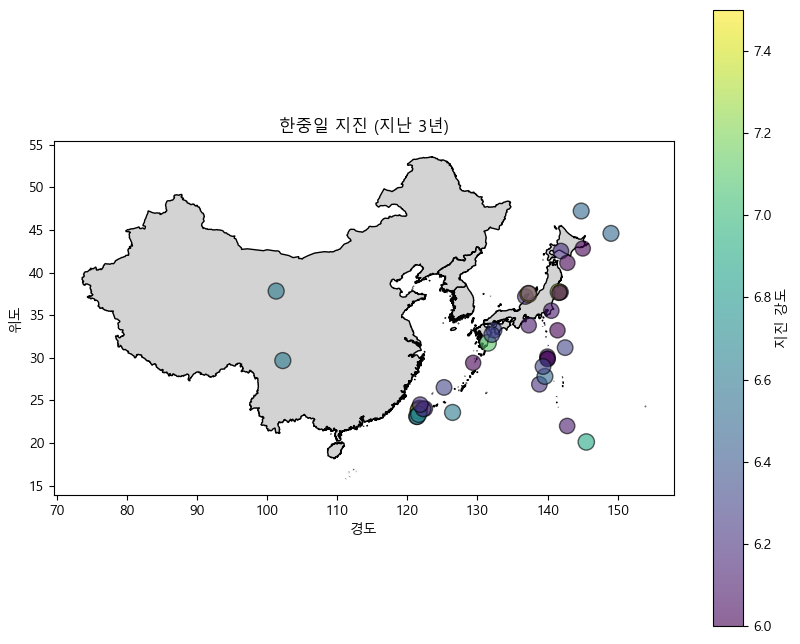

In [4]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에서 폰트 설정
plt.rc('font', family=font_prop.get_name())
# 1. USGS API로 지진 데이터를 가져옴
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
start_date = (datetime.now() - timedelta(days=3*365)).strftime("%Y-%m-%d")
end_date = datetime.now().strftime("%Y-%m-%d")

# 한국, 일본, 중국 범위를 커버하는 지리적 경계 설정 (위도, 경도)
query_params = {
    "format": "geojson",  # GeoJSON 형식으로 결과 반환
    "starttime": start_date,
    "endtime": end_date,
    "minlatitude": 20,   # 남쪽 범위 (한국, 일본, 중국 포함)
    "maxlatitude": 50,   # 북쪽 범위
    "minlongitude": 100,  # 서쪽 범위
    "maxlongitude": 150,  # 동쪽 범위
    "minmagnitude": 6.0,  # 최소 강도 설정 (6.0 이상 지진)
}

# USGS API 호출
response = requests.get(base_url, params=query_params)

# 2. 데이터가 정상적으로 로드되었는지 확인
if response.status_code == 200:
    data = response.json()
    earthquakes = data['features']  # 지진 목록

    # 3. 발생한 지진의 좌표, 강도, 발생일 정보를 저장할 리스트
    lats = []
    lons = []
    magnitudes = []

    # 4. 각 지진의 좌표와 강도 추출
    for eq in earthquakes:
        coords = eq['geometry']['coordinates']
        magnitude = eq['properties']['mag']
        
        # 좌표와 강도 추출
        lons.append(coords[0])  # 경도
        lats.append(coords[1])  # 위도
        magnitudes.append(magnitude)

    # 5. 지도 시각화를 위한 GeoPandas 세계 지도 불러오기
    file_path = r'.\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp'  # Update the path

    # 6. Shapefile 불러오기
    world = gpd.read_file(file_path)

    # 7. 중국, 일본, 한국 지역 필터링
    # Check the column names to ensure they are correct
    print(world.columns)  # Output column names to ensure correct filtering

    # Filter for China, Japan, and South Korea
    filtered_world = world[world['NAME'].isin(["China", "Japan", "South Korea", "North Korea"])]

    # 8. 지도 시각화
    ax = filtered_world.plot(color='lightgray', edgecolor='black', figsize=(10, 8))

    # 9. 지진 데이터 시각화 (강도를 반영한 점 크기 설정)
    scatter = ax.scatter(
        lons, lats, c=magnitudes, cmap='viridis', s=[mag * 20 for mag in magnitudes], alpha=0.6, edgecolors="black"
    )

    # 10. 색상바 추가 (지진 강도에 따른 색상)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('지진 강도')

    # 11. 그래프 타이틀 및 설정
    plt.title("한중일 지진 (지난 3년)")
    plt.xlabel("경도")
    plt.ylabel("위도")

    # 12. 그래프 출력
    plt.show()
    
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
